In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import plot_model
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [5]:
images=[]
labels=[]

for directory in os.listdir('/content/train'):
    for subdir in os.listdir(os.path.join('/content/train',directory)):
        for image in os.listdir(os.path.join('/content/train',directory, subdir)):
            img_path = os.path.join('/content/train', directory, subdir, image)
            images.append(img_path)
            labels.append(subdir)

In [6]:
df = pd.DataFrame({'Image':images,'Label':labels})
df.tail()

,Image,Label
17995,/content/train/train/19/813.jpg,19
17996,/content/train/train/19/38.jpg,19
17997,/content/train/train/19/146.jpg,19
17998,/content/train/train/19/854.jpg,19
17999,/content/train/train/19/684.jpg,19


[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


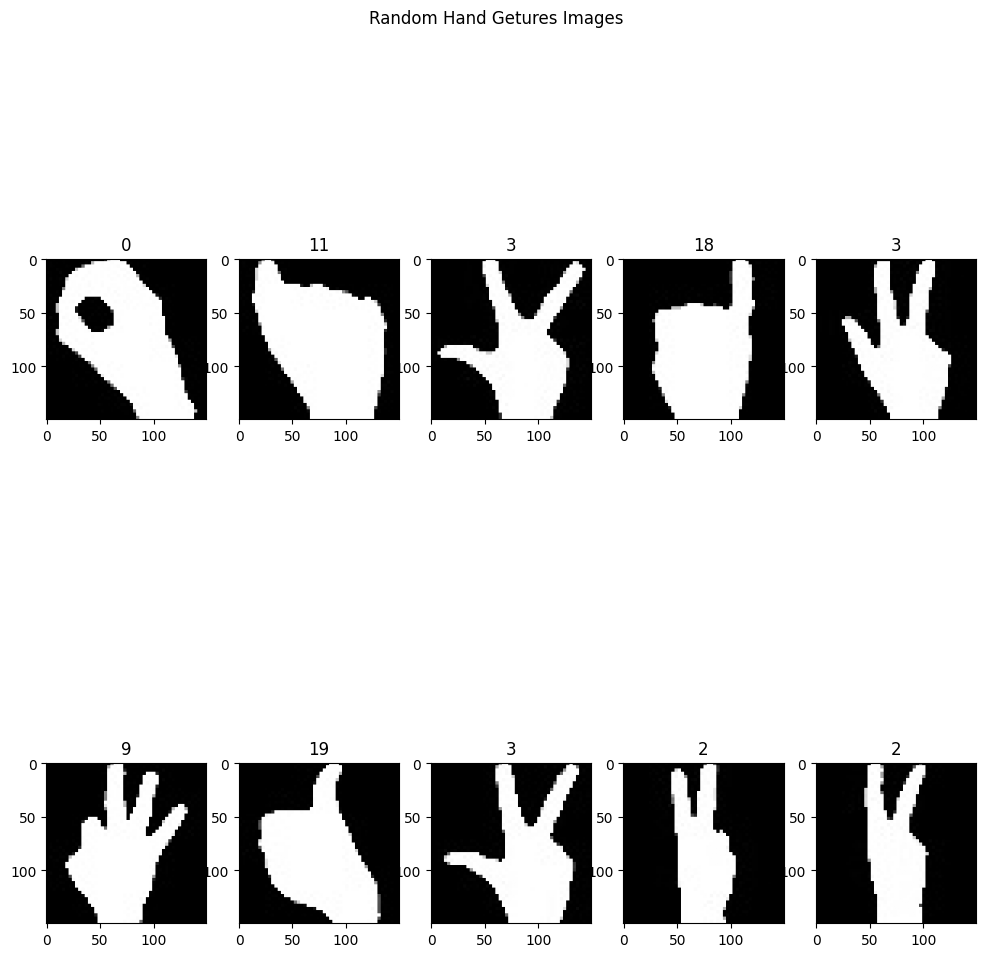

In [7]:
df_img = df['Image']
df_label = df['Label']

nrows=2
ncols = 5
fig,axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand Getures Images")
print(axx)

for i in range(nrows):
        for j in range(ncols):
                n = np.random.randint(0,20000)
                img = load_img(df['Image'][n],target_size=(150,150))
                img = img_to_array(img)
                img = np.expand_dims(img,axis=0)
                img /= 255.0 #scale image values between 0,1
                label = df_label[n]

                image = np.squeeze(img)
                axx[i][j].imshow(image)
                axx[i][j].set_title(label)
plt.show()
plt.close()

In [8]:
x_train,x = train_test_split(df, test_size = 0.3)
x_valid,x_test = train_test_split(x,test_size=0.5)
x_train.info()
x_valid.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12600 entries, 9836 to 13068
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   12600 non-null  object
 1   Label   12600 non-null  object
dtypes: object(2)
memory usage: 295.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 17242 to 8217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2700 non-null   object
 1   Label   2700 non-null   object
dtypes: object(2)
memory usage: 63.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 4780 to 8151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2700 non-null   object
 1   Label   2700 non-null   object
dtypes: object(2)
memory usage: 63.3+ KB


In [9]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.2,1.2])


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1.0/255)

In [10]:
b_size =1
train_generator = train_datagen.flow_from_dataframe(dataframe=x_train,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=True)
valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=False)

Found 12600 validated image filenames belonging to 20 classes.
Found 2700 validated image filenames belonging to 20 classes.


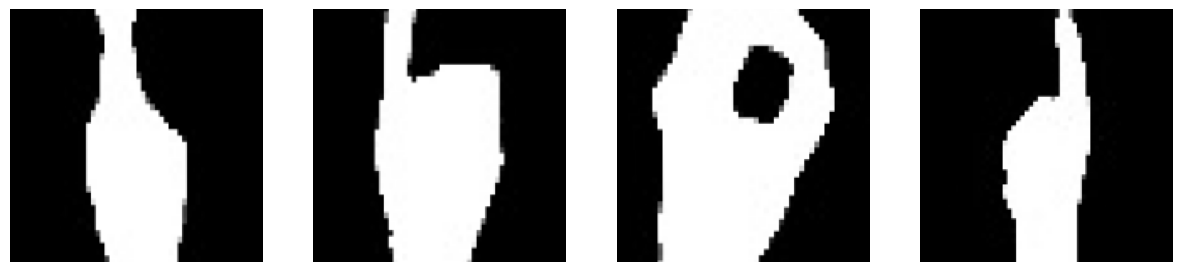

In [11]:
fig,axx = plt.subplots(nrows=1,ncols=4, figsize=(15,15))

for i in range(4):
    image = next(train_generator)[0].astype('float64')
    image = np.squeeze(image)
    axx[i].imshow(image)
    axx[i].axis('off')

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(20))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                 

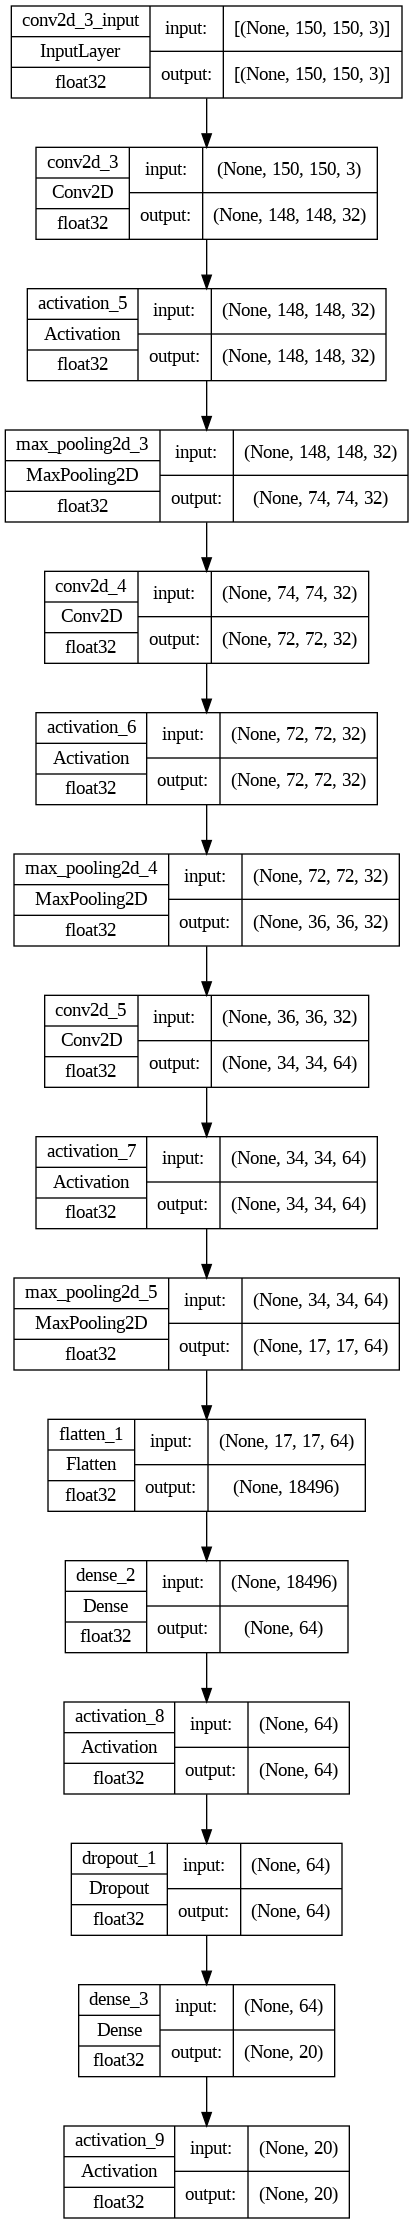

In [16]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True
)

In [17]:
history = model.fit(train_generator,
                   steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data = valid_generator,
                    validation_steps=800//b_size)

model.save('handG_R.h5')

Epoch 1/20
2000/2000 [==============================] - 111s 55ms/step - loss: 0.8873 - categorical_accuracy: 0.7345 - val_loss: 0.0381 - val_categorical_accuracy: 0.9925
Epoch 2/20
2000/2000 [==============================] - 106s 53ms/step - loss: 0.2104 - categorical_accuracy: 0.9360 - val_loss: 0.0088 - val_categorical_accuracy: 0.9962
Epoch 3/20
2000/2000 [==============================] - 106s 53ms/step - loss: 0.1618 - categorical_accuracy: 0.9570 - val_loss: 0.0031 - val_categorical_accuracy: 1.0000
Epoch 4/20
2000/2000 [==============================] - 109s 54ms/step - loss: 0.1300 - categorical_accuracy: 0.9710 - val_loss: 8.0403e-04 - val_categorical_accuracy: 1.0000
Epoch 5/20
2000/2000 [==============================] - 110s 55ms/step - loss: 0.0851 - categorical_accuracy: 0.9740 - val_loss: 0.0019 - val_categorical_accuracy: 0.9987
Epoch 6/20
2000/2000 [==============================] - 105s 53ms/step - loss: 0.0617 - categorical_accuracy: 0.9815 - val_loss: 0.0017 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor': '#f2f8fd' ,
                   'paper_bgcolor': 'white',},
                   template='plotly_white')


In [20]:
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['categorical_accuracy'],
mode='lines',
name=f'training accuracy',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_categorical_accuracy'],
                         mode='lines',
                         name=f'Validation accuracy',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training accuracy",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor': '#f2f8fd' ,
                   'paper_bgcolor': 'white',},
                   template='plotly_white')

In [21]:
x_test.info()
x_test.tail(20)
samples= x_test.sample(n=5)

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 4780 to 8151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2700 non-null   object
 1   Label   2700 non-null   object
dtypes: object(2)
memory usage: 63.3+ KB


In [22]:
model = load_model('./handG_R.h5',compile=True)